#**Work Life Integration Problem**

## Problem Information

**Problem** 

According to a global survey, about 450 million people live with mental disorders, including anxiety, depression, that can be one of the primary causes of poor health, stress and disability worldwide. In the current virtual scenario, it becomes very crucial for employers to know the mental health of their employees as this directly impacts productivity of the company or workflow and also influences team and workplace culture. To assess and understand the situation across the company, a survey was rolled out to the employees of XyX corporation last year. The responses to the survey are provided along with the ‘mental fatigue’ score which was computed for each employee.

**Task**

You need to review survey results of last year and the ‘Mental fatigue score’ computed for each employee. This data is provided to you in the form of train.csv. We want to understand and observe the change in mental health parameters of all the employees in the XyX corporation. Therefore, we want to predict the mental fatigue score of employees this year based on the provided features and helping XyX corporation to take appropriate corrective steps for their employees.

Employee ID - Unique identifier of the employee

Date of Joining - Date on which the employee joined the company

Gender - Gender of the employee

Company Type - Type of company [eg: Service based, Product based, etc.]

WFH Setup Available - Whether proper work from home setup is available or not

Age - Age of employee

Tenure - Number of years in the organization

Vacations taken - Number of vacations taken

Designation - Seniority level of the employee in codes

Average Hours worked per day - Hours allocated per day

Employee Satisfaction Score - Satisfaction score provided by the employees

Mental Fatigue Score - Dependent Variable [ to be predicted ]


## Exploratory Data Analysis

In [ ]:
import pandas as pd

#Read the Training Data from the csv file
actualEmpData = pd.read_csv('train.csv')

#Check the dataset info for missing values and types
actualEmpData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Employee ID                   22750 non-null  object 
 1   Date of Joining               22750 non-null  object 
 2   Gender                        22750 non-null  object 
 3   Company Type                  22750 non-null  object 
 4   WFH Setup Available           22750 non-null  object 
 5   Age                           22750 non-null  int64  
 6   Tenure                        22750 non-null  int64  
 7   Vacations taken               22750 non-null  int64  
 8   Designation                   22750 non-null  int64  
 9   Average Hours worked per day  21369 non-null  float64
 10  Employee satisfaction score   20633 non-null  float64
 11  Mental Fatigue Score          21739 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 2.1+ MB


In [ ]:
#Check Data Sample
actualEmpData.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Age,Tenure,Vacations taken,Designation,Average Hours worked per day,Employee satisfaction score,Mental Fatigue Score
0,fffe32003000360033003200,2008-09-30,Female,Service,No,52,18,8,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,26,12,4,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,63,20,4,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,59,20,12,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,63,10,9,3,7.0,6.9,0.52


**Found**: 

3 colums are categorical, that might be important for the model

**Decision**: 

Convert all the categorical colums to numerical/boolean values.

In [ ]:
# Check for the types of values in categorical column
actualEmpData['WFH Setup Available'].value_counts()

Yes    12290
No     10460
Name: WFH Setup Available, dtype: int64

In [ ]:
# Check for the types of values in categorical column
actualEmpData['Gender'].value_counts()

Female    11908
Male      10842
Name: Gender, dtype: int64

In [ ]:
# Check for the types of values in categorical column
actualEmpData['Company Type'].value_counts()

Service    14833
Product     7917
Name: Company Type, dtype: int64

In [ ]:
# Categorical data to Boolean
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
actualEmpData['GenderVal'] = le.fit_transform(actualEmpData['Gender'])
actualEmpData['CompanyTypeVal'] = le.fit_transform(actualEmpData['Company Type'])
actualEmpData['WFHAvailVal'] = le.fit_transform(actualEmpData['WFH Setup Available'])
actualEmpData.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Age,Tenure,Vacations taken,Designation,Average Hours worked per day,Employee satisfaction score,Mental Fatigue Score,GenderVal,CompanyTypeVal,WFHAvailVal
0,fffe32003000360033003200,2008-09-30,Female,Service,No,52,18,8,2,3.0,3.8,0.16,0,1,0
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,26,12,4,1,2.0,5.0,0.36,1,1,1
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,63,20,4,2,NaN,5.8,0.49,0,0,1
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,59,20,12,1,1.0,2.6,0.20,1,1,1
4,fffe31003900340031003600,2008-07-24,Female,Service,No,63,10,9,3,7.0,6.9,0.52,0,1,0


In [ ]:
#Dropping the categorical columns and DOJ as well
newEmpData = actualEmpData.drop(['Date of Joining','Gender','Company Type','WFH Setup Available'],axis=1)
newEmpData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Employee ID                   22750 non-null  object 
 1   Age                           22750 non-null  int64  
 2   Tenure                        22750 non-null  int64  
 3   Vacations taken               22750 non-null  int64  
 4   Designation                   22750 non-null  int64  
 5   Average Hours worked per day  21369 non-null  float64
 6   Employee satisfaction score   20633 non-null  float64
 7   Mental Fatigue Score          21739 non-null  float64
 8   GenderVal                     22750 non-null  int64  
 9   CompanyTypeVal                22750 non-null  int64  
 10  WFHAvailVal                   22750 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 1.9+ MB


In [ ]:
# Check for the duplicated values via Employee Id
newEmpData['Employee ID'].duplicated().sum()

0

**Found**: 

No Duplicate Entries

**Decision**:

Removing the Employee ID as well since the all rows are indexed and we need to use Imputer which can't work with Object values.

In [ ]:
newEmpData.drop(['Employee ID'],axis=1,inplace=True)
newEmpData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           22750 non-null  int64  
 1   Tenure                        22750 non-null  int64  
 2   Vacations taken               22750 non-null  int64  
 3   Designation                   22750 non-null  int64  
 4   Average Hours worked per day  21369 non-null  float64
 5   Employee satisfaction score   20633 non-null  float64
 6   Mental Fatigue Score          21739 non-null  float64
 7   GenderVal                     22750 non-null  int64  
 8   CompanyTypeVal                22750 non-null  int64  
 9   WFHAvailVal                   22750 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 1.7 MB


**Found**: 

Few rows have missing values.

**Decision**: 

removedEmpData - Rows with missing values are removed.

meanEmpData - Rows with missing values are replaced with their column mean.

medianEmpData - Rows with missing values are replaced with their column median.

In [ ]:
removedEmpData = newEmpData.dropna()
removedEmpData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18670 entries, 0 to 22749
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           18670 non-null  int64  
 1   Tenure                        18670 non-null  int64  
 2   Vacations taken               18670 non-null  int64  
 3   Designation                   18670 non-null  int64  
 4   Average Hours worked per day  18670 non-null  float64
 5   Employee satisfaction score   18670 non-null  float64
 6   Mental Fatigue Score          18670 non-null  float64
 7   GenderVal                     18670 non-null  int64  
 8   CompanyTypeVal                18670 non-null  int64  
 9   WFHAvailVal                   18670 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 1.6 MB


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
imputer.fit(newEmpData)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [ ]:
X = imputer.transform(newEmpData)
meanEmpData = pd.DataFrame(X, columns=newEmpData.columns)
meanEmpData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           22750 non-null  float64
 1   Tenure                        22750 non-null  float64
 2   Vacations taken               22750 non-null  float64
 3   Designation                   22750 non-null  float64
 4   Average Hours worked per day  22750 non-null  float64
 5   Employee satisfaction score   22750 non-null  float64
 6   Mental Fatigue Score          22750 non-null  float64
 7   GenderVal                     22750 non-null  float64
 8   CompanyTypeVal                22750 non-null  float64
 9   WFHAvailVal                   22750 non-null  float64
dtypes: float64(10)
memory usage: 1.7 MB


In [ ]:
imputer = SimpleImputer(strategy="median")
imputer.fit(newEmpData)
X = imputer.transform(newEmpData)
medianEmpData = pd.DataFrame(X, columns=newEmpData.columns)
medianEmpData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           22750 non-null  float64
 1   Tenure                        22750 non-null  float64
 2   Vacations taken               22750 non-null  float64
 3   Designation                   22750 non-null  float64
 4   Average Hours worked per day  22750 non-null  float64
 5   Employee satisfaction score   22750 non-null  float64
 6   Mental Fatigue Score          22750 non-null  float64
 7   GenderVal                     22750 non-null  float64
 8   CompanyTypeVal                22750 non-null  float64
 9   WFHAvailVal                   22750 non-null  float64
dtypes: float64(10)
memory usage: 1.7 MB


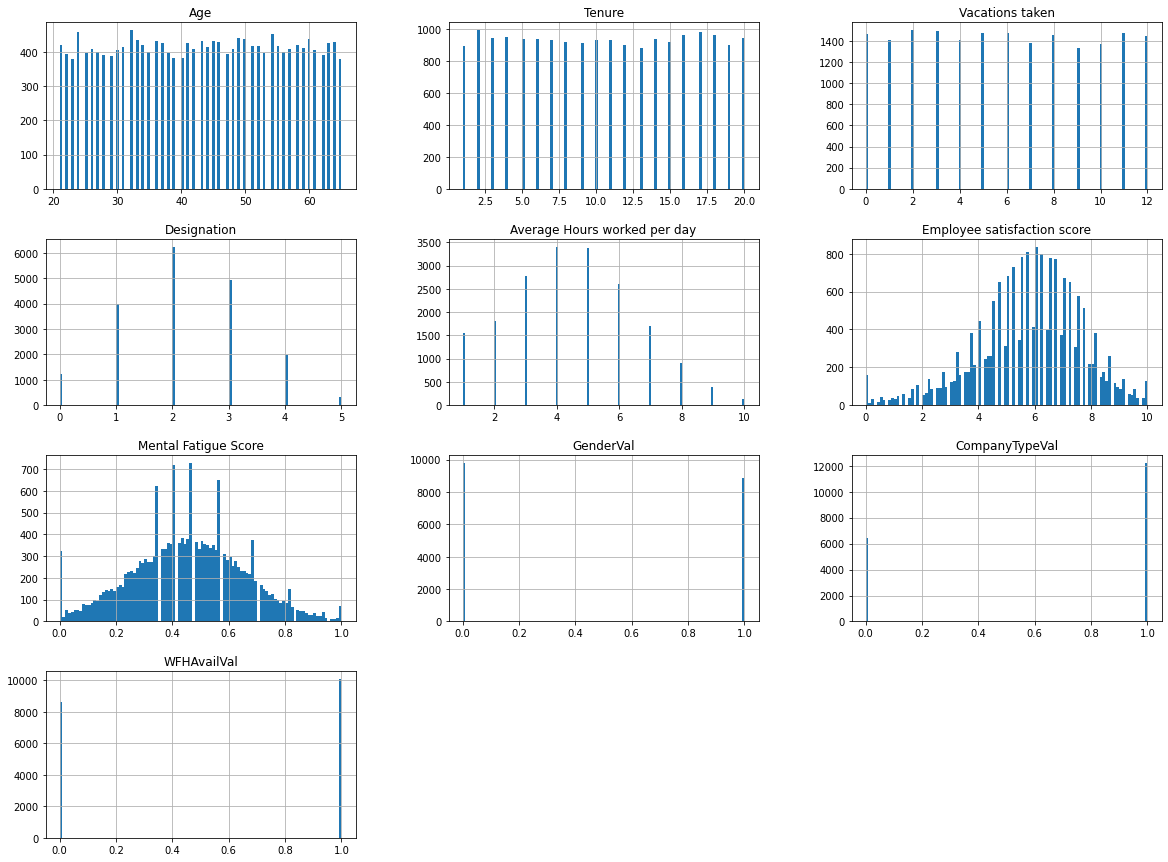

In [ ]:
import matplotlib.pyplot as plt

#Histograms of dataset where rows with missing values were removed
removedEmpData.hist(bins=100,figsize=(20, 15))
plt.show()

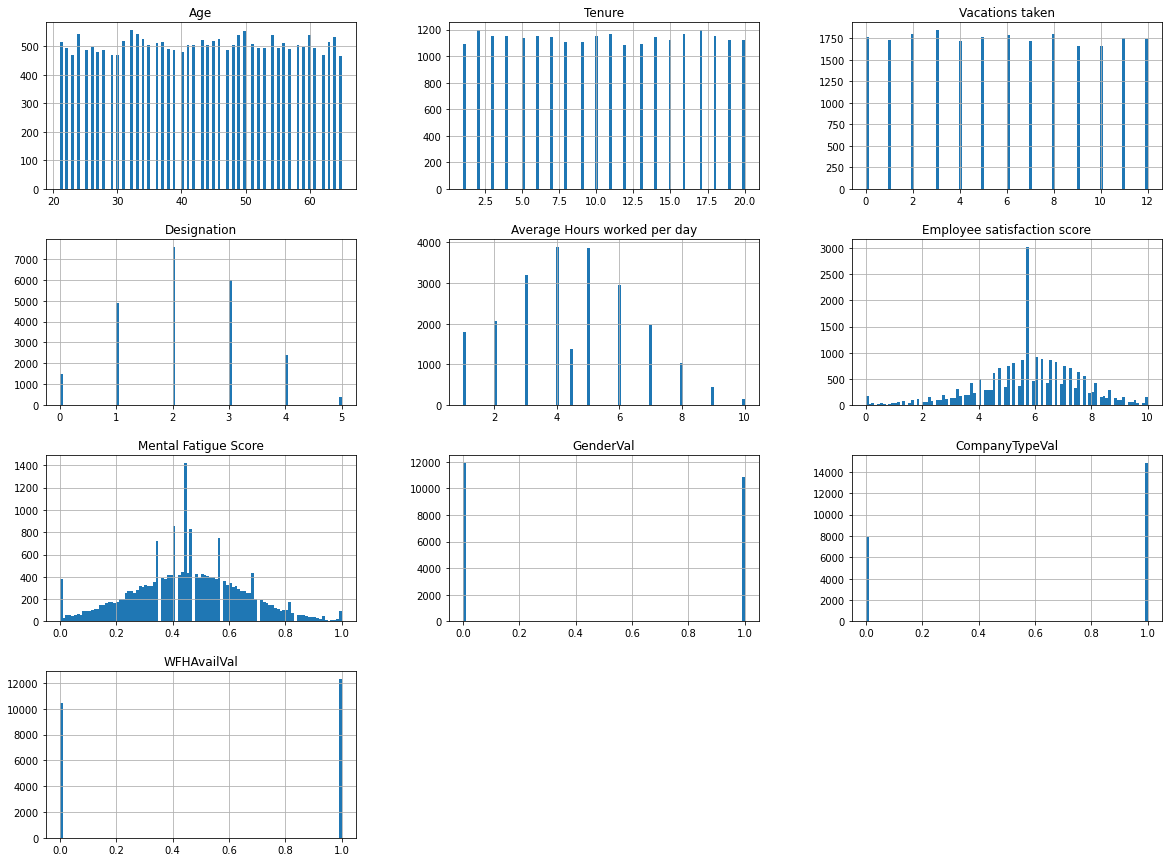

In [ ]:
#Histograms of dataset where rows with missing values were imputed with mean
meanEmpData.hist(bins=100,figsize=(20, 15))
plt.show()

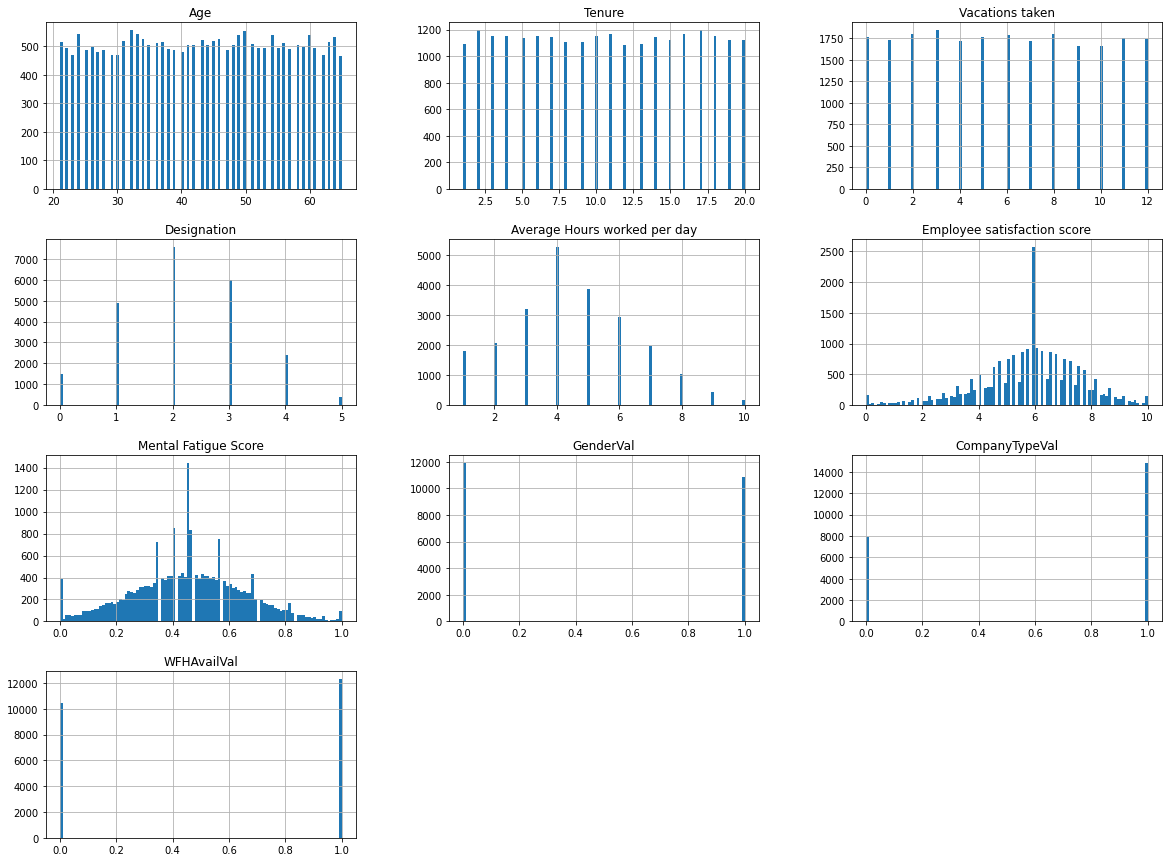

In [ ]:
#Histograms of dataset where rows with missing values were imputed with median
medianEmpData.hist(bins=100,figsize=(20, 15))
plt.show()

##Working on Dataset with missing values removed

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

#Split the dataset intro training and test data set to avoid overfitting and underfitting
trainData, testData = train_test_split(removedEmpData, test_size=0.2, random_state=22)
print(f"Data in training Data:{len(trainData)} \nData in test data:{len(testData)}")

Data in training Data:14936 
Data in test data:3734


In [ ]:
#Set data range of all variables from 0 to 1 using Min Max
removedEmpData=(removedEmpData-removedEmpData.min())/(removedEmpData.max()-removedEmpData.min())
removedEmpData.head()

,Age,Tenure,Vacations taken,Designation,Average Hours worked per day,Employee satisfaction score,Mental Fatigue Score,GenderVal,CompanyTypeVal,WFHAvailVal
0,0.704545,0.894737,0.666667,0.4,0.222222,0.38,0.16,0.0,1.0,0.0
1,0.113636,0.578947,0.333333,0.2,0.111111,0.50,0.36,1.0,1.0,1.0
3,0.863636,1.000000,1.000000,0.2,0.000000,0.26,0.20,1.0,1.0,1.0
4,0.954545,0.473684,0.750000,0.6,0.666667,0.69,0.52,0.0,1.0,0.0
5,0.522727,0.368421,0.833333,0.4,0.333333,0.36,0.29,1.0,0.0,1.0


In [ ]:
#Since after after split it can happen that training set have one type of value
#Thus shuffle split column with large data split, so that equal no are there in both training and test set.
SSSplit = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=22)
for trainIndex, testIndex in SSSplit.split(removedEmpData, removedEmpData['CompanyTypeVal']):
    stratTrainSet = removedEmpData.iloc[trainIndex]
    stratTestSet = removedEmpData.iloc[testIndex]
stratTrainSet.describe()

,Age,Tenure,Vacations taken,Designation,Average Hours worked per day,Employee satisfaction score,Mental Fatigue Score,GenderVal,CompanyTypeVal,WFHAvailVal
count,13069.000000,13069.000000,13069.000000,13069.000000,13069.000000,13069.000000,13069.000000,13069.000000,13069.000000,13069.000000
mean,0.501676,0.500385,0.496952,0.434831,0.386190,0.572829,0.449721,0.472722,0.654373,0.539215
std,0.294415,0.305000,0.312559,0.226589,0.226595,0.191435,0.199102,0.499274,0.475590,0.498479
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.210526,0.250000,0.200000,0.222222,0.460000,0.310000,0.000000,0.000000,0.000000
50%,0.500000,0.473684,0.500000,0.400000,0.333333,0.590000,0.450000,0.000000,1.000000,1.000000
75%,0.750000,0.789474,0.750000,0.600000,0.555556,0.710000,0.580000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
stratTestSet.describe()

,Age,Tenure,Vacations taken,Designation,Average Hours worked per day,Employee satisfaction score,Mental Fatigue Score,GenderVal,CompanyTypeVal,WFHAvailVal
count,5601.000000,5601.000000,5601.000000,5601.000000,5601.000000,5601.000000,5601.000000,5601.000000,5601.000000,5601.000000
mean,0.500398,0.499234,0.495983,0.438243,0.390049,0.574033,0.452337,0.482592,0.654347,0.539547
std,0.293287,0.303426,0.311878,0.226719,0.228588,0.193407,0.200840,0.499741,0.475623,0.498478
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.210526,0.250000,0.200000,0.222222,0.450000,0.310000,0.000000,0.000000,0.000000
50%,0.500000,0.473684,0.500000,0.400000,0.333333,0.590000,0.460000,0.000000,1.000000,1.000000
75%,0.750000,0.789474,0.750000,0.600000,0.555556,0.710000,0.590000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
correlationEmpData = removedEmpData.corr()
correlationEmpData['Mental Fatigue Score'].sort_values(ascending=False)

Mental Fatigue Score            1.000000
Employee satisfaction score     0.932447
Average Hours worked per day    0.844274
Designation                     0.726992
GenderVal                       0.154532
CompanyTypeVal                  0.008211
Tenure                         -0.004574
Vacations taken                -0.006305
Age                            -0.007228
WFHAvailVal                    -0.302112
Name: Mental Fatigue Score, dtype: float64

**Found**:

4 Columns have strong +ve Correlation

1 Column have strong -ve Correlation

In [ ]:
covarianceEmpData = removedEmpData.cov()
covarianceEmpData['Mental Fatigue Score'].sort_values(ascending=False)

Mental Fatigue Score            0.039849
Average Hours worked per day    0.038291
Employee satisfaction score     0.035743
Designation                     0.032889
GenderVal                       0.015406
CompanyTypeVal                  0.000780
Tenure                         -0.000278
Vacations taken                -0.000393
Age                            -0.000424
WFHAvailVal                    -0.030062
Name: Mental Fatigue Score, dtype: float64

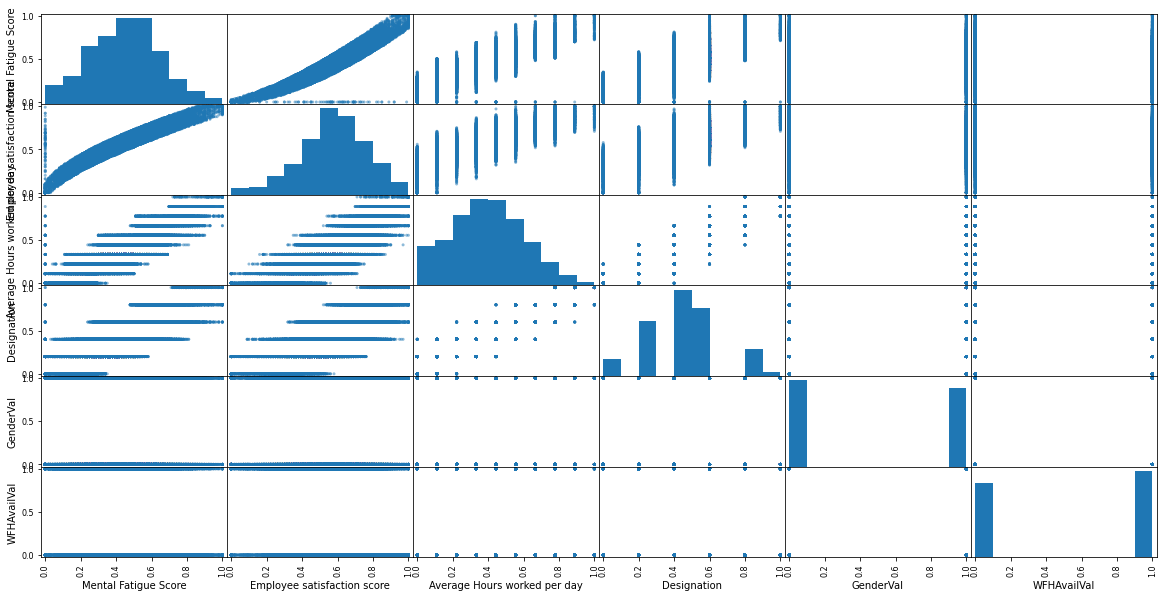

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(removedEmpData[["Mental Fatigue Score","Employee satisfaction score","Average Hours worked per day","Designation","GenderVal","WFHAvailVal"]],figsize = (20,10))
plt.show()

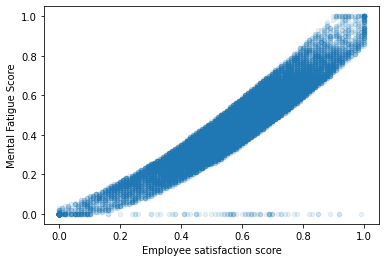

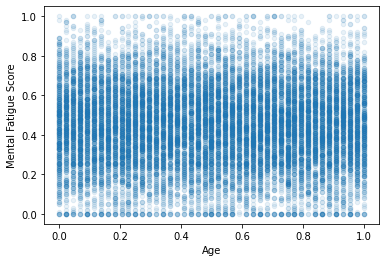

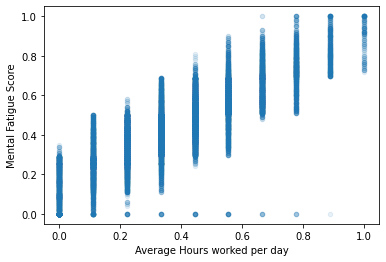

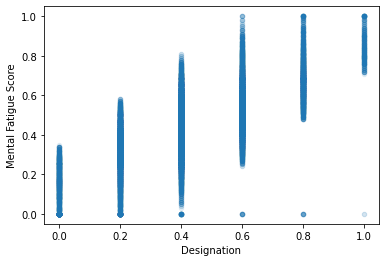

In [ ]:
removedEmpData.plot(kind="scatter",x="Employee satisfaction score",y="Mental Fatigue Score",alpha=0.1)
removedEmpData.plot(kind="scatter",x="Age",y="Mental Fatigue Score",alpha=0.1)
removedEmpData.plot(kind="scatter",x="Average Hours worked per day",y="Mental Fatigue Score",alpha=0.1)
removedEmpData.plot(kind="scatter",x="Designation",y="Mental Fatigue Score",alpha=0.1)
plt.show()

In [ ]:
trainSet = stratTrainSet.drop("Mental Fatigue Score", axis=1)
trainSetLabels = stratTrainSet["Mental Fatigue Score"].copy()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])
fittrainSet = my_pipeline.fit_transform(trainSet)
trainSet.shape

(13069, 9)

##Model Fitting

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
# model = LinearRegression()
# model = DecisionTreeRegressor()
# model = RandomForestRegressor()
model = SGDRegressor()
model.fit(fittrainSet, trainSetLabels)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [ ]:
some_data = trainSet.iloc[:10]
some_data

,Age,Tenure,Vacations taken,Designation,Average Hours worked per day,Employee satisfaction score,GenderVal,CompanyTypeVal,WFHAvailVal
16892,0.295455,0.315789,0.416667,0.6,0.666667,0.76,1.0,0.0,0.0
955,0.818182,0.157895,0.416667,0.8,0.666667,0.69,0.0,1.0,1.0
9365,0.227273,0.631579,0.500000,0.4,0.333333,0.57,0.0,1.0,0.0
1126,0.022727,0.000000,0.083333,0.4,0.111111,0.46,1.0,0.0,1.0
20930,0.636364,0.526316,0.666667,0.6,0.444444,0.71,1.0,0.0,1.0
15817,0.340909,0.157895,0.750000,0.6,0.444444,0.64,1.0,1.0,1.0
7537,0.931818,0.684211,0.583333,0.8,0.666667,0.61,1.0,1.0,0.0
21609,0.181818,0.947368,0.666667,0.6,0.333333,0.62,0.0,1.0,1.0
4781,0.340909,0.736842,0.583333,0.4,0.222222,0.31,0.0,1.0,0.0
11946,0.250000,0.684211,1.000000,0.4,0.111111,0.28,0.0,1.0,1.0


In [ ]:
some_labels = trainSetLabels.iloc[:10]
some_labels

16892    0.71
955      0.57
9365     0.51
1126     0.26
20930    0.65
15817    0.47
7537     0.53
21609    0.47
4781     0.23
11946    0.18
Name: Mental Fatigue Score, dtype: float64

In [ ]:
prepared_data = my_pipeline.transform(some_data)

In [ ]:
model.predict(prepared_data)

array([0.66842734, 0.59866583, 0.43970945, 0.297473  , 0.55983054,
       0.50940989, 0.55303615, 0.4589429 , 0.21855162, 0.15336994])

In [ ]:
list(some_labels)

[0.71, 0.57, 0.51, 0.26, 0.65, 0.47, 0.53, 0.47, 0.23, 0.18]

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
predictions = model.predict(fittrainSet)
mse = mean_squared_error(trainSetLabels, predictions)
rmse = np.sqrt(mse)
rmse

0.06463548866743006

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, fittrainSet, trainSetLabels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)
rmse_scores

array([0.06749966, 0.06099614, 0.06774827, 0.07073216, 0.06002271,
       0.06181676, 0.06648477, 0.05891737, 0.06479865, 0.06624165])

In [ ]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())
print_scores(rmse_scores)

Scores: [0.06749966 0.06099614 0.06774827 0.07073216 0.06002271 0.06181676
 0.06648477 0.05891737 0.06479865 0.06624165]
Mean:  0.06452581523442748
Standard deviation:  0.0036896197633277217


##Test Set Trail Begins

In [ ]:
testSet = stratTestSet.drop("Mental Fatigue Score", axis=1)
testSetLabels = stratTestSet["Mental Fatigue Score"].copy()
fittestSet = my_pipeline.fit_transform(testSet)
predictions = model.predict(fittestSet)
mse = mean_squared_error(testSetLabels, predictions)
rmse = np.sqrt(mse)
rmse

0.06245996574792873

In [ ]:
testSetLabels.iloc[:20]

16212    0.09
8901     0.29
10150    0.32
20559    0.31
1136     0.00
7417     0.67
10213    0.39
22340    0.52
20402    0.33
1320     0.01
4513     0.32
3099     0.32
6755     0.39
4541     0.23
6458     0.37
7138     0.25
16439    0.43
15446    0.28
10064    0.52
19704    0.56
Name: Mental Fatigue Score, dtype: float64

In [ ]:
predictions[:20]

array([ 0.02568248,  0.32535228,  0.35773878,  0.38733772,  0.37308111,
        0.62428339,  0.44445309,  0.46806206,  0.37435521, -0.02361351,
        0.3876394 ,  0.36023532,  0.42412879,  0.21296895,  0.29106801,
        0.26150359,  0.39968905,  0.24603231,  0.4734238 ,  0.66195645])

In [ ]:
model.score(fittrainSet, trainSetLabels)

0.8946038067193152

In [ ]:
model.score(fittestSet, testSetLabels)

0.9032656566614088

# Real Test Set Check

In [ ]:
testEmpData = pd.read_csv('test.csv')
testEmpData.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Age,Tenure,Vacations taken,Designation,Average Hours worked per day,Employee satisfaction score
0,fffe31003300390039003000,2008-12-10,Female,Service,No,39,14,4,2,5,7.7
1,fffe31003300310037003800,2008-08-14,Female,Product,Yes,51,9,4,1,2,5.2
2,fffe33003400380035003900,2008-11-13,Male,Product,Yes,30,5,8,1,3,5.9
3,fffe3100370039003200,2008-02-07,Female,Service,No,22,5,6,3,6,4.6
4,fffe32003600390036003700,2008-07-17,Female,Product,No,62,10,3,2,5,6.4


In [ ]:
# Check for the duplicated values via Employee Id
testEmpData['Employee ID'].duplicated().sum()

0

In [ ]:
testEmpData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12250 entries, 0 to 12249
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Employee ID                   12250 non-null  object 
 1   Date of Joining               12250 non-null  object 
 2   Gender                        12250 non-null  object 
 3   Company Type                  12250 non-null  object 
 4   WFH Setup Available           12250 non-null  object 
 5   Age                           12250 non-null  int64  
 6   Tenure                        12250 non-null  int64  
 7   Vacations taken               12250 non-null  int64  
 8   Designation                   12250 non-null  int64  
 9   Average Hours worked per day  12250 non-null  int64  
 10  Employee satisfaction score   12250 non-null  float64
dtypes: float64(1), int64(5), object(5)
memory usage: 1.0+ MB


In [ ]:
testEmpData['GenderVal'] = le.fit_transform(testEmpData['Gender'])
testEmpData['CompanyTypeVal'] = le.fit_transform(testEmpData['Company Type'])
testEmpData['WFHAvailVal'] = le.fit_transform(testEmpData['WFH Setup Available'])
newtestEmpData = testEmpData.drop(['Employee ID','Date of Joining','Gender','Company Type','WFH Setup Available'],axis=1)
newtestEmpData.head()

,Age,Tenure,Vacations taken,Designation,Average Hours worked per day,Employee satisfaction score,GenderVal,CompanyTypeVal,WFHAvailVal
0,39,14,4,2,5,7.7,0,1,0
1,51,9,4,1,2,5.2,0,0,1
2,30,5,8,1,3,5.9,1,0,1
3,22,5,6,3,6,4.6,0,1,0
4,62,10,3,2,5,6.4,0,0,0


In [ ]:
newtestEmpData=(newtestEmpData-newtestEmpData.min())/(newtestEmpData.max()-newtestEmpData.min())
testData = my_pipeline.transform(newtestEmpData)
testPrediction = model.predict(testData)
testPrediction[:10]

array([0.61298779, 0.33688934, 0.41921894, 0.41334296, 0.51962921,
       0.52732878, 0.32454942, 0.67772931, 0.59833844, 0.45637446])

In [ ]:
submission = pd.DataFrame()
submission['Employee ID'] = testEmpData['Employee ID']
submission['Mental Fatigue Score'] = testPrediction
submission.iloc[:20]

,Employee ID,Mental Fatigue Score
0,fffe31003300390039003000,0.612988
1,fffe31003300310037003800,0.336889
2,fffe33003400380035003900,0.419219
3,fffe3100370039003200,0.413343
4,fffe32003600390036003700,0.519629
5,fffe3600390032003200,0.527329
6,fffe3600370032003200,0.324549
7,fffe32003900390030003000,0.677729
8,fffe3100370031003000,0.598338
9,fffe31003500320037003600,0.456374


In [ ]:
submission.to_csv('prediction.csv',index=False)